# **Importing Libraries**

https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link/data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB

# **Dataset Description**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/BRACU Courses/ML LABS/Project/cancer patient data sets.csv")
df.shape

(1000, 26)

In [ ]:
df.head(3)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High


In [ ]:
#Type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

# **Checking for Duplicate Values**

In [ ]:
df.duplicated().sum()

0

# **Checking if Dataset is Balanced**

In [ ]:
#Checking if dataset is balanced
df["Level"].value_counts()

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

<ipython-input-40-0bfb8e87cf50>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.countplot(x="Level",data=df, palette="mako")


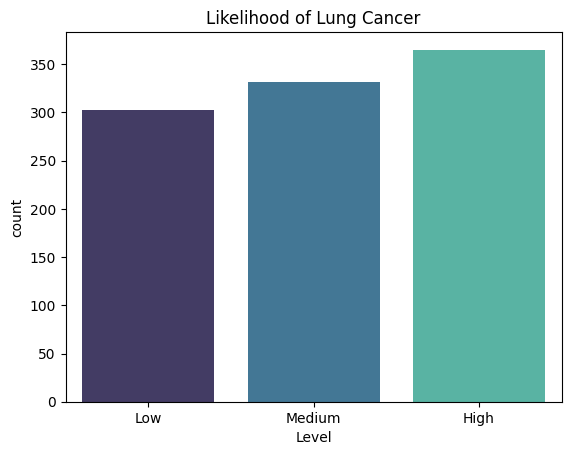

In [ ]:
sbn.countplot(x="Level",data=df, palette="mako")
plt.title("Likelihood of Lung Cancer")
plt.show()

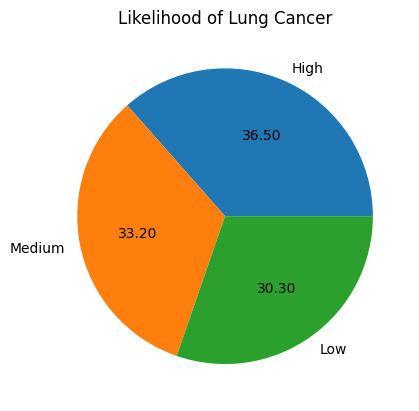

In [ ]:
plt.title("Likelihood of Lung Cancer")
plt.pie(df["Level"].value_counts(),labels=["High","Medium","Low"], autopct="%0.2f")
plt.show()

In [ ]:
df=df.drop(["index","Patient Id"],axis=1)
df.head(3)

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High


# **Checking Null Values**

In [ ]:
df.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

# **Encoding Categorical Values**

In [ ]:
df["Level"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [ ]:
df["Level"]=df["Level"].map({"High":2, "Medium":1,"Low":0})
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


# **Finding Correlation**

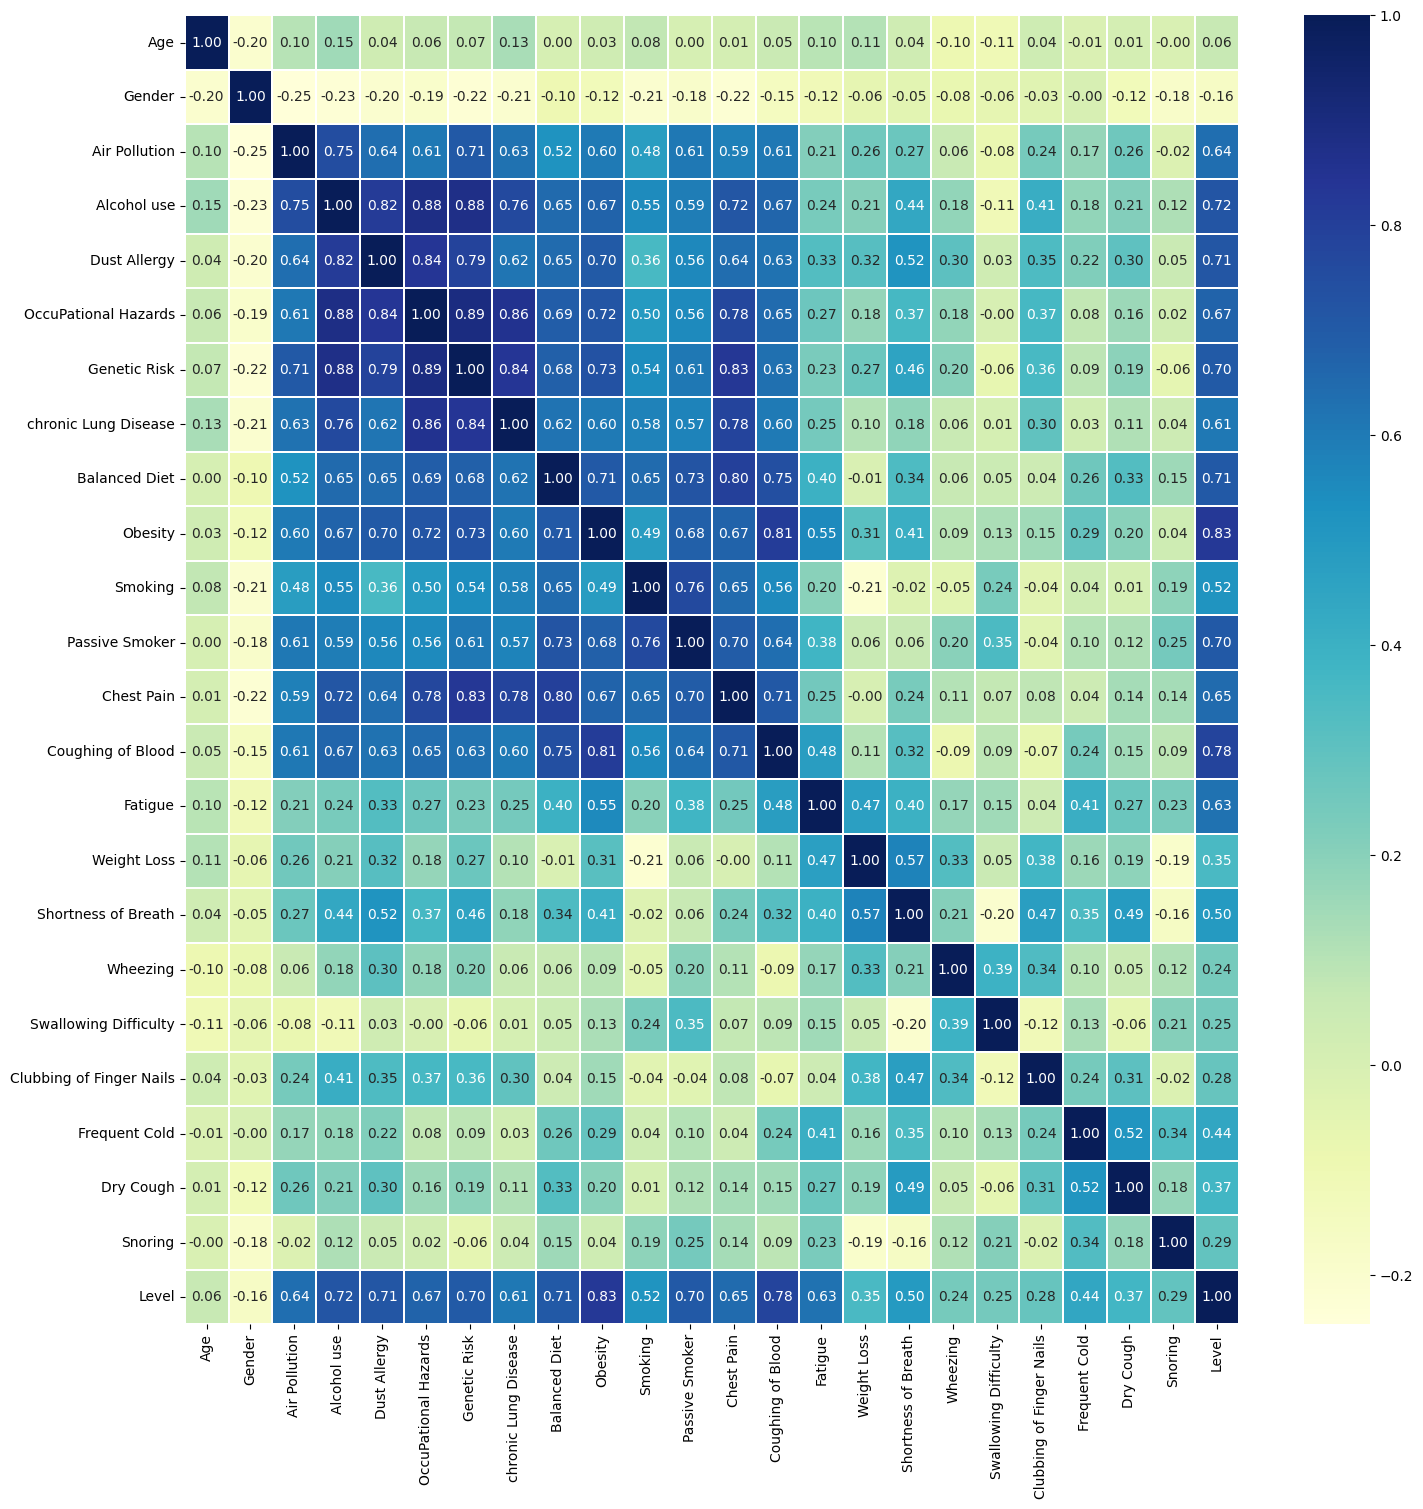

In [ ]:
plt.figure(figsize=(17,17))
sbn.heatmap(df.corr(),cmap='YlGnBu',annot=True,fmt=".2f",linewidths=0.2)
plt.show()

In [ ]:
df=df.drop(["Age","Gender", "Wheezing","Swallowing Difficulty", "Clubbing of Finger Nails", "Snoring","Dry Cough", "Weight Loss"], axis=1)
df.shape

(1000, 16)

# **Data Splitting**

---
*  Stratified
*  Train Set (70%)
*  Test Set  (30%)

In [ ]:
X = df.drop('Level',axis=1)
y = df['Level']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)




# **Feature Scaling**

In [ ]:
# MinMax scaler
scaler_minmax = MinMaxScaler()
X_train_MinMax = scaler_minmax.fit_transform(X_train)
X_test_MinMax = scaler_minmax.transform(X_test)

# Robust Scaler
scaler_robust = RobustScaler()
X_train_Robust = scaler_robust.fit_transform(X_train)
X_test_Robust = scaler_robust.transform(X_test)

# Standard Scaler
scaler_standard = StandardScaler()
X_train_Standard = scaler_standard.fit_transform(X_train)
X_test_Standard = scaler_standard.transform(X_test)

# Normalizer
normalizer = Normalizer(norm='l2')
X_train_Normalizer = normalizer.fit_transform(X_train)
X_test_Normalizer = normalizer.transform(X_test)


# **Performance Measurement**

---
*  Precision \
*  Recall \
*  Accuracy \
*  F1 Score \
*  Confusion Matrix \

In [ ]:
def performance_scores(y_pred):
    prec=precision_score(y_test, y_pred, average='micro')
    rec=recall_score(y_test, y_pred, average='micro')
    acc=accuracy_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred, average='micro')
    return[prec,rec,acc,f1]


In [ ]:
def print_func(list1,y_pred):
    cm=confusion_matrix(y_test, y_pred)
    print(f"Precision: {list1[0]*100:.2f}%")
    print(f"Recall: {list1[1]*100:.2f}%")
    print(f"Accuracy: {list1[2]*100:.2f}%")
    print(f"F1 Score: {list1[3]*100:.2f}%")
    print(f"\nConfusion Matrix:\n {cm}")
    print()
    plt.figure(figsize=(1.75,1.75))
    sbn.heatmap(cm, cmap=sbn.color_palette("ch:start=.2,rot=-.3", as_cmap=True), fmt="d", annot=True, linewidths=0.2, cbar=False)
    plt.show()
    print("\n Classification Report: ")
    print("_______________________\n\n")
    print(classification_report(y_test, y_pred,zero_division=0))


# **Model-1 : Decision Tree Classifier**




Random Forest Max Depth: 2

Precision: 78.00%
Recall: 78.00%
Accuracy: 78.00%
F1 Score: 78.00%

Confusion Matrix:
 [[ 79   4   8]
 [ 49  48   3]
 [  0   2 107]]



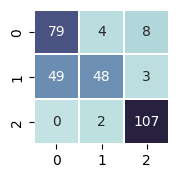


 Classification Report: 
_______________________


              precision    recall  f1-score   support

           0       0.62      0.87      0.72        91
           1       0.89      0.48      0.62       100
           2       0.91      0.98      0.94       109

    accuracy                           0.78       300
   macro avg       0.80      0.78      0.76       300
weighted avg       0.81      0.78      0.77       300


Random Forest Max Depth: 3

Precision: 94.33%
Recall: 94.33%
Accuracy: 94.33%
F1 Score: 94.33%

Confusion Matrix:
 [[ 83   8   0]
 [  6  91   3]
 [  0   0 109]]



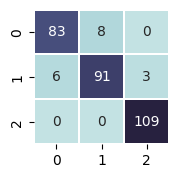


 Classification Report: 
_______________________


              precision    recall  f1-score   support

           0       0.93      0.91      0.92        91
           1       0.92      0.91      0.91       100
           2       0.97      1.00      0.99       109

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300


Random Forest Max Depth: 4

Precision: 98.33%
Recall: 98.33%
Accuracy: 98.33%
F1 Score: 98.33%

Confusion Matrix:
 [[ 91   0   0]
 [  2  95   3]
 [  0   0 109]]



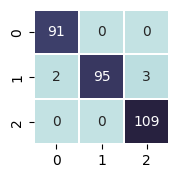


 Classification Report: 
_______________________


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        91
           1       1.00      0.95      0.97       100
           2       0.97      1.00      0.99       109

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300


Random Forest Max Depth: 5

Precision: 99.33%
Recall: 99.33%
Accuracy: 99.33%
F1 Score: 99.33%

Confusion Matrix:
 [[ 91   0   0]
 [  2  98   0]
 [  0   0 109]]



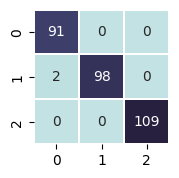


 Classification Report: 
_______________________


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        91
           1       1.00      0.98      0.99       100
           2       1.00      1.00      1.00       109

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300




In [ ]:
depths = [2, 3, 4, 5]
score_list=[]

for depth in depths:
    model_dt = DecisionTreeClassifier(max_depth=depth)
    model_dt.fit(X_train, y_train)
    y_pred_dt = model_dt.predict(X_test)
    dt_l=performance_scores(y_pred_dt)
    print(f"Random Forest Max Depth: {depth}")
    print()
    print_func(dt_l,y_pred_dt)
    print('===========================')
    print()
    dt_l.append(depth)
    score_list.append(dt_l)

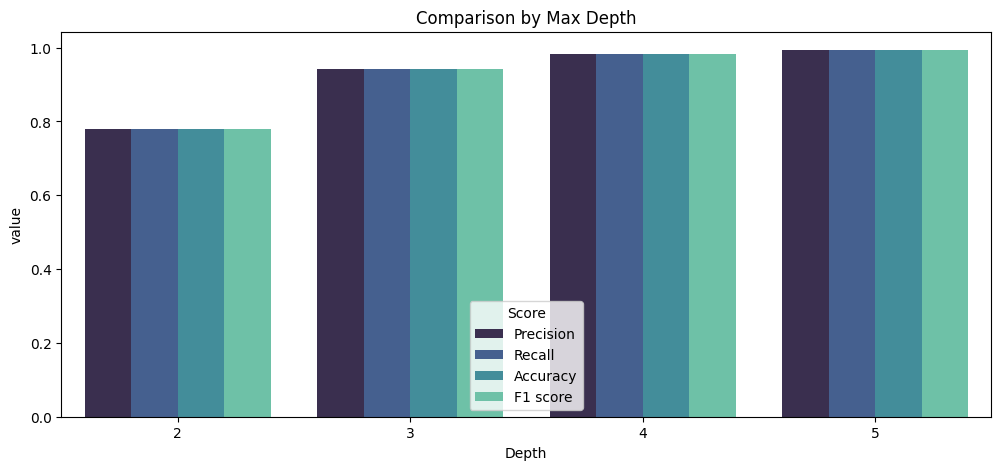

In [ ]:
bp=pd.DataFrame(score_list, columns=['Precision', 'Recall','Accuracy','F1 score', 'Depth'])
bp=pd.melt(frame=bp, id_vars='Depth', var_name='Score', value_name='value')
fig, ax=plt.subplots(figsize=(12, 5))
sbn.barplot(ax=ax, data=bp, x='Depth', y='value', hue='Score', palette=('mako'))
plt.title("Comparison by Max Depth")
plt.show()

# **Model-2 : Random Forest Classifier**

Random Forest Max Depth: 2

Precision: 79.00%
Recall: 79.00%
Accuracy: 79.00%
F1 Score: 79.00%

Confusion Matrix:
 [[ 86   4   1]
 [ 43  44  13]
 [  0   2 107]]



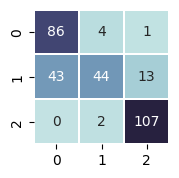


 Classification Report: 
_______________________


              precision    recall  f1-score   support

           0       0.67      0.95      0.78        91
           1       0.88      0.44      0.59       100
           2       0.88      0.98      0.93       109

    accuracy                           0.79       300
   macro avg       0.81      0.79      0.77       300
weighted avg       0.82      0.79      0.77       300


Random Forest Max Depth: 3

Precision: 97.67%
Recall: 97.67%
Accuracy: 97.67%
F1 Score: 97.67%

Confusion Matrix:
 [[ 86   5   0]
 [  2  98   0]
 [  0   0 109]]



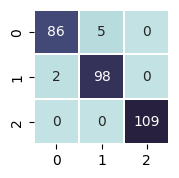


 Classification Report: 
_______________________


              precision    recall  f1-score   support

           0       0.98      0.95      0.96        91
           1       0.95      0.98      0.97       100
           2       1.00      1.00      1.00       109

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300


Random Forest Max Depth: 4

Precision: 99.33%
Recall: 99.33%
Accuracy: 99.33%
F1 Score: 99.33%

Confusion Matrix:
 [[ 91   0   0]
 [  2  98   0]
 [  0   0 109]]



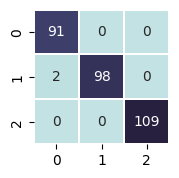


 Classification Report: 
_______________________


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        91
           1       1.00      0.98      0.99       100
           2       1.00      1.00      1.00       109

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300


Random Forest Max Depth: 5

Precision: 99.33%
Recall: 99.33%
Accuracy: 99.33%
F1 Score: 99.33%

Confusion Matrix:
 [[ 91   0   0]
 [  2  98   0]
 [  0   0 109]]



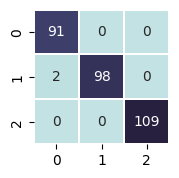


 Classification Report: 
_______________________


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        91
           1       1.00      0.98      0.99       100
           2       1.00      1.00      1.00       109

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300




In [ ]:
maxdepths = [2, 3, 4, 5]
score_list=[]

for depth in maxdepths:
    model_rf = RandomForestClassifier(n_estimators=10, max_depth=depth, max_features='sqrt')
    model_rf.fit(X_train, y_train)
    y_pred_rf = model_rf.predict(X_test)
    rf_l = performance_scores(y_pred_rf)
    print(f"Random Forest Max Depth: {depth}")
    print()
    print_func(rf_l, y_pred_rf)
    print('===========================')
    print()
    rf_l.append(depth)
    score_list.append(rf_l)

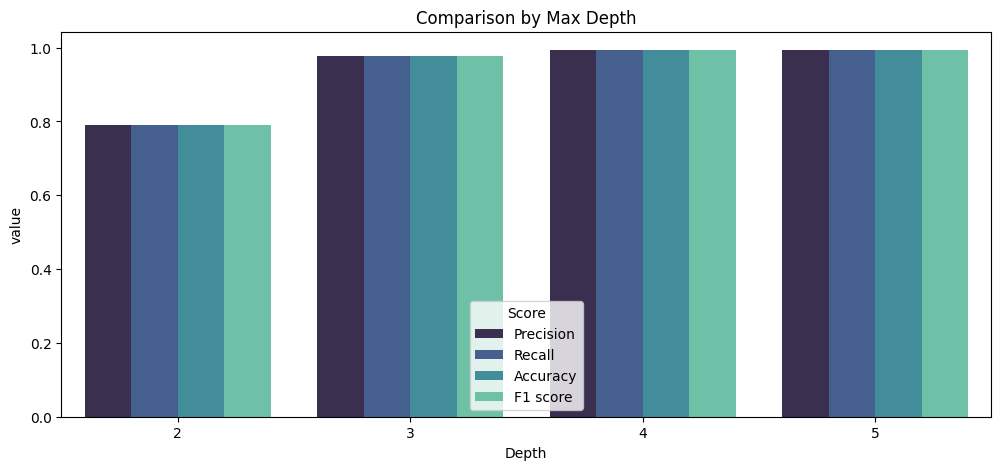

In [ ]:
bp=pd.DataFrame(score_list, columns=['Precision', 'Recall','Accuracy','F1 score', 'Depth'])
bp=pd.melt(frame=bp, id_vars='Depth', var_name='Score', value_name='value')
fig, ax=plt.subplots(figsize=(12, 5))
sbn.barplot(ax=ax, data=bp, x='Depth', y='value', hue='Score', palette='mako')
plt.title("Comparison by Max Depth")
plt.show()

# **Model-3 : Support vector machine (SVM)**


___________________________________________________ 
 
=======  Scalers: No Scaling, sigmoid ======

____________________________________________________
 
Precision: 6.67%
Recall: 6.67%
Accuracy: 6.67%
F1 Score: 6.67%

Confusion Matrix:
 [[  0   0  91]
 [  0   0 100]
 [ 89   0  20]]



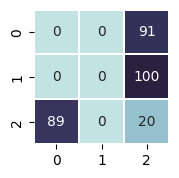


 Classification Report: 
_______________________


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        91
           1       0.00      0.00      0.00       100
           2       0.09      0.18      0.12       109

    accuracy                           0.07       300
   macro avg       0.03      0.06      0.04       300
weighted avg       0.03      0.07      0.05       300


___________________________________________________ 
 
=======  Scalers: Normalizer Scaling, sigmoid ======

____________________________________________________
 
Precision: 36.33%
Recall: 36.33%
Accuracy: 36.33%
F1 Score: 36.33%

Confusion Matrix:
 [[  0   0  91]
 [  0   0 100]
 [  0   0 109]]



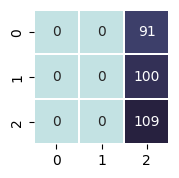


 Classification Report: 
_______________________


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        91
           1       0.00      0.00      0.00       100
           2       0.36      1.00      0.53       109

    accuracy                           0.36       300
   macro avg       0.12      0.33      0.18       300
weighted avg       0.13      0.36      0.19       300


___________________________________________________ 
 
=======  Scalers: Standard Scaling, sigmoid ======

____________________________________________________
 
Precision: 90.67%
Recall: 90.67%
Accuracy: 90.67%
F1 Score: 90.67%

Confusion Matrix:
 [[ 76  15   0]
 [  9  87   4]
 [  0   0 109]]



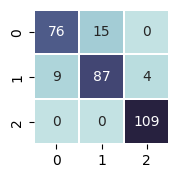


 Classification Report: 
_______________________


              precision    recall  f1-score   support

           0       0.89      0.84      0.86        91
           1       0.85      0.87      0.86       100
           2       0.96      1.00      0.98       109

    accuracy                           0.91       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.91      0.91      0.91       300


___________________________________________________ 
 
=======  Scalers: Robust Scaling, sigmoid ======

____________________________________________________
 
Precision: 92.67%
Recall: 92.67%
Accuracy: 92.67%
F1 Score: 92.67%

Confusion Matrix:
 [[ 82   9   0]
 [  9  87   4]
 [  0   0 109]]



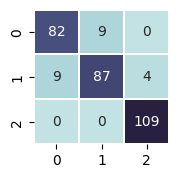


 Classification Report: 
_______________________


              precision    recall  f1-score   support

           0       0.90      0.90      0.90        91
           1       0.91      0.87      0.89       100
           2       0.96      1.00      0.98       109

    accuracy                           0.93       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.93      0.93      0.93       300




In [ ]:
score_list=[]

scalers = {
    'No Scaling': (X_train, X_test),
    'Normalizer Scaling': (X_train_Normalizer, X_test_Normalizer),
    'Standard Scaling': (X_train_Standard, X_test_Standard),
    'Robust Scaling': (X_train_Robust, X_test_Robust)

}
for scaler_name, (X_train_scaled, X_test_scaled) in scalers.items():
        print("___________________________________________________ \n ")
        print(f"=======  Scalers: {scaler_name}, sigmoid ======\n")
        print("____________________________________________________\n ")
        svm = SVC(kernel= 'sigmoid')
        svm.fit(X_train_scaled, y_train)
        y_pred_svm = svm.predict(X_test_scaled)
        svm_l=performance_scores(y_pred_svm)
        print_func(svm_l,y_pred_svm)
        svm_l.append(scaler_name)
        score_list.append(svm_l)
        print()




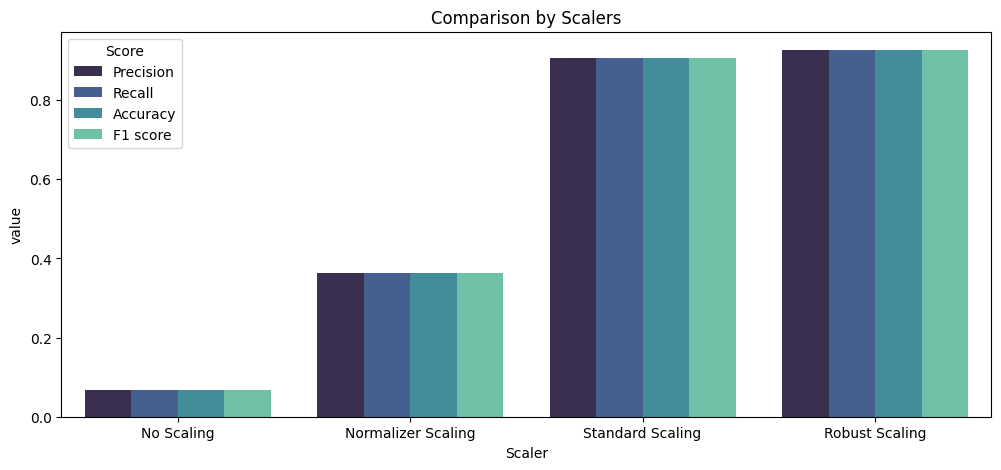

In [ ]:
bp=pd.DataFrame(score_list, columns=['Precision', 'Recall','Accuracy','F1 score', 'Scaler'])
bp=pd.melt(frame=bp, id_vars='Scaler', var_name='Score', value_name='value')
fig, ax=plt.subplots(figsize=(12, 5))
sbn.barplot(ax=ax, data=bp, x='Scaler', y='value', hue='Score', palette='mako')
plt.title("Comparison by Scalers")
plt.show()

# **Model-4 : Naive Bayes Classifier**


Scaler: No Scaling
Precision: 36.33%
Recall: 36.33%
Accuracy: 36.33%
F1 Score: 36.33%

Confusion Matrix:
 [[  0   0  91]
 [  0   0 100]
 [  0   0 109]]



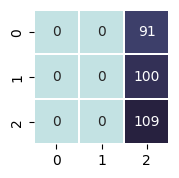


 Classification Report: 
_______________________


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        91
           1       0.00      0.00      0.00       100
           2       0.36      1.00      0.53       109

    accuracy                           0.36       300
   macro avg       0.12      0.33      0.18       300
weighted avg       0.13      0.36      0.19       300


Scaler: MinMax Scaling
Precision: 84.00%
Recall: 84.00%
Accuracy: 84.00%
F1 Score: 84.00%

Confusion Matrix:
 [[ 66  14  11]
 [  3  77  20]
 [  0   0 109]]



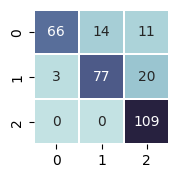


 Classification Report: 
_______________________


              precision    recall  f1-score   support

           0       0.96      0.73      0.83        91
           1       0.85      0.77      0.81       100
           2       0.78      1.00      0.88       109

    accuracy                           0.84       300
   macro avg       0.86      0.83      0.84       300
weighted avg       0.86      0.84      0.84       300




In [ ]:
score_list=[]
scalers = {
    'No Scaling': (X_train, X_test),
    'MinMax Scaling': (X_train_MinMax, X_test_MinMax),
}
nb_classifier = BernoulliNB()
for scaler_name, (X_train_scaled, X_test_scaled) in scalers.items():
        nb_classifier.fit(X_train_scaled, y_train)
        y_pred_nb = nb_classifier.predict(X_test_scaled)
        print(f'Scaler: {scaler_name}')
        nb_l=performance_scores(y_pred_nb)
        print_func(nb_l,y_pred_nb)
        nb_l.append(scaler_name)
        score_list.append(nb_l)
        print()

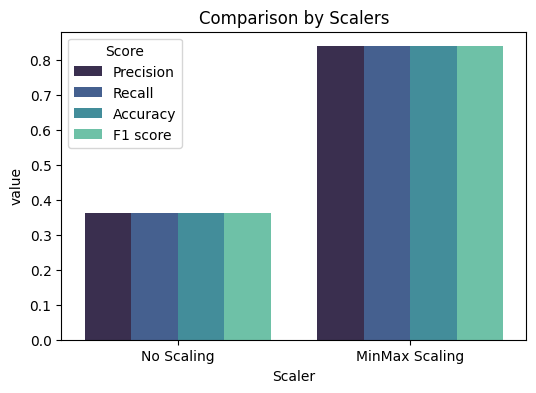

In [ ]:
bp=pd.DataFrame(score_list, columns=['Precision', 'Recall','Accuracy','F1 score', 'Scaler'])
bp=pd.melt(frame=bp, id_vars='Scaler', var_name='Score', value_name='value')
fig, ax=plt.subplots(figsize=(6, 4))
sbn.barplot(ax=ax, data=bp, x='Scaler', y='value', hue='Score', palette='mako')
plt.title("Comparison by Scalers")
plt.show()

# **Comparing the Unscaled Scores of the Models**

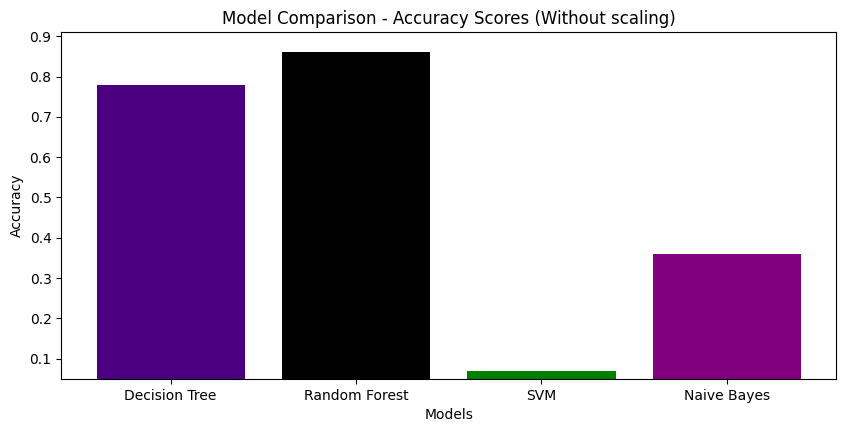

In [ ]:
models=["Decision Tree","Random Forest","SVM","Naive Bayes"]
acc_vals=[0.78,0.86,0.07,0.36]
plt.figure(figsize=(10, 4.5))
plt.bar(models, acc_vals, color=["indigo","black","green","purple"])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy Scores (Without scaling)")
plt.ylim(0.05, 0.91)
plt.show()

# **Comparing the Scores of the Models after changing the hyperparameters/scaling**

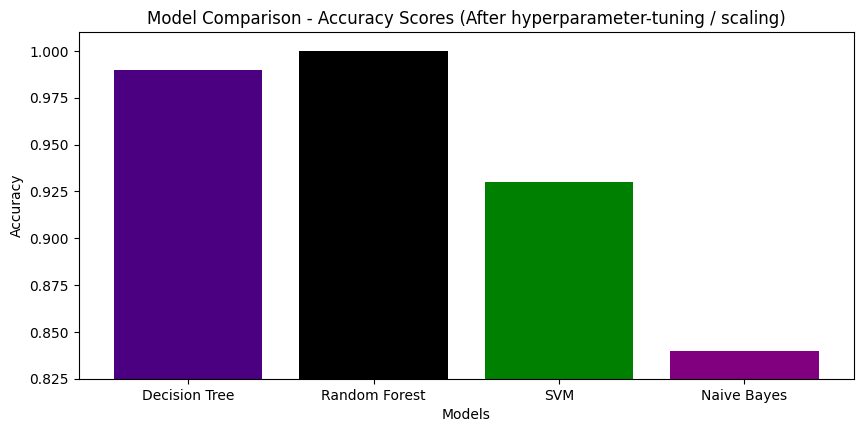

In [ ]:
#comparing accuracy scores
models=["Decision Tree","Random Forest","SVM","Naive Bayes"]
acc_vals=[0.99,1.0,0.93,0.84]
plt.figure(figsize=(10, 4.5))
plt.bar(models, acc_vals, color=["indigo","black","green","purple"])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy Scores (After hyperparameter-tuning / scaling)")
plt.ylim(0.825, 1.01)
plt.show()